In [68]:
import pandas as pd

# Load the Excel file to explore its content and structure
campaign_data = pd.read_csv('Amazon Ads All.csv')

# Display the first few rows of the dataframe and the column names to understand the dataset
campaign_data.head(), campaign_data.columns


(   ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
 0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
 1   66528  3003509  6064714310  offsite_mobileapp            4       0   
 2   88613  9302679  7428981046    offsite_desktop            4       0   
 3   57975  3325755  7489730099    offsite_desktop           13       0   
 4   13386  6532070  6004552148  offsite_mobileweb          246       0   
 
    auction_cost  adjusted_cost hit_day_utc  \
 0         10.89          8.790    02/05/24   
 1          0.08          0.032    02/05/24   
 2          0.08          0.032    02/05/24   
 3          0.26          0.127    02/05/24   
 4          2.46          1.978    02/05/24   
 
                             targeting_secondary                 vertical  \
 0  category=Automotive Replacement Control Arms               Automotive   
 1              category=Canned & Jarred Seafood  Consumer Packaged Goods   
 2                       category

In [69]:
import pandas as pd

# Load your dataset (assuming campaign_data is your dataframe)
# Example: campaign_data = pd.read_csv('path_to_your_data.csv')

# Fill missing values in 'vertical' and 'sub_vertical' with 'Unknown'
campaign_data['vertical'].fillna('Unknown', inplace=True)
campaign_data['sub_vertical'].fillna('Unknown', inplace=True)

# Identify the last 6 columns
last_6_columns = campaign_data.columns[-6:]

# Fill missing values in the last 6 columns with 0
campaign_data[last_6_columns] = campaign_data[last_6_columns].fillna(0)

# Display the cleaned dataset
print("Cleaned Campaign Data Sample:")
print(campaign_data.head())


Cleaned Campaign Data Sample:
   ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
1   66528  3003509  6064714310  offsite_mobileapp            4       0   
2   88613  9302679  7428981046    offsite_desktop            4       0   
3   57975  3325755  7489730099    offsite_desktop           13       0   
4   13386  6532070  6004552148  offsite_mobileweb          246       0   

   auction_cost  adjusted_cost hit_day_utc  \
0         10.89          8.790    02/05/24   
1          0.08          0.032    02/05/24   
2          0.08          0.032    02/05/24   
3          0.26          0.127    02/05/24   
4          2.46          1.978    02/05/24   

                            targeting_secondary                 vertical  \
0  category=Automotive Replacement Control Arms               Automotive   
1              category=Canned & Jarred Seafood  Consumer Packaged Goods   
2                   

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_62329/2673213727.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  campaign_data['vertical'].fillna('Unknown', inplace=True)
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_62329/2673213727.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [70]:
campaign_data.head()

ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
1   66528  3003509  6064714310  offsite_mobileapp            4       0   
2   88613  9302679  7428981046    offsite_desktop            4       0   
3   57975  3325755  7489730099    offsite_desktop           13       0   
4   13386  6532070  6004552148  offsite_mobileweb          246       0   

   auction_cost  adjusted_cost hit_day_utc  \
0         10.89          8.790    02/05/24   
1          0.08          0.032    02/05/24   
2          0.08          0.032    02/05/24   
3          0.26          0.127    02/05/24   
4          2.46          1.978    02/05/24   

                            targeting_secondary                 vertical  \
0  category=Automotive Replacement Control Arms               Automotive   
1              category=Canned & Jarred Seafood  Consumer Packaged Goods   
2                       category=Comedy & Humor                  Unknown   
3                  category=Centrifugal Juicers                Hardlines   
4              category=Baby Bottle Sterilizers  Consumer Packaged Goods   

               sub_vertical  ntb_click_attributed_units_sold  \
0        Automotive - Other                              0.0   
1  Health and Personal Care                              0.0   
2                   Unknown                              0.0   
3           Office Products                              0.0   
4          Baby Consumables                              0.0   

   ntb_view_attributed_units_sold  ntb_click_attributed_orders  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             2.0                          0.0   

   ntb_view_attributed_orders  view_attributed_units_sold  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         1.0                         2.0   

   view_attributed_orders hit_day_utc_parsed  
0                     1.0         2024-05-02  
1                     0.0         2024-05-02  
2                     0.0         2024-05-02  
3                     0.0         2024-05-02  
4                     1.0         2024-05-02

In [65]:
campaign_data['hit_day_utc_parsed'] = pd.to_datetime(campaign_data['hit_day_utc'], format='%d/%m/%y', errors='coerce')

# Parse remaining unparsed dates in the '%Y-%m-%d %H:%M:%S' format
mask = campaign_data['hit_day_utc_parsed'].isna()
campaign_data.loc[mask, 'hit_day_utc_parsed'] = pd.to_datetime(campaign_data.loc[mask, 'hit_day_utc'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Check for any remaining non-parsed dates
remaining_non_parsed = campaign_data[campaign_data['hit_day_utc_parsed'].isna()]
if not remaining_non_parsed.empty:
    print("Remaining non-parsed dates:")
    print(remaining_non_parsed)

campaign_data.head()

ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
1   84373  1295011  7875390725    offsite_desktop         2043       0   
2   84373  6370624  9985955750  offsite_mobileweb         1452       0   
3   84373  1295011  7875390725    offsite_desktop         1312       0   
4   84373  1295011  7875390725  offsite_mobileapp            8       0   

   auction_cost  adjusted_cost hit_day_utc  \
0      10.89000        8.79000    02/05/24   
1      26.61464       19.44791    01/05/24   
2      14.52000       11.68400    01/05/24   
3      16.59940       11.94286    30/04/24   
4       0.11608        0.07161    01/05/24   

                                 targeting_secondary    vertical  \
0       category=Automotive Replacement Control Arms  Automotive   
1         category=Automotive Replacement Brake Kits  Automotive   
2       category=Automotive Replacement Control Arms  Automotive   
3  category=Automotive Replacement Hub Assemblies...  Automotive   
4         category=Automotive Replacement Brake Kits  Automotive   

         sub_vertical  ntb_click_attributed_units_sold  \
0  Automotive - Other                              0.0   
1  Automotive - Other                              0.0   
2  Automotive - Other                              0.0   
3  Automotive - Other                              0.0   
4  Automotive - Other                              0.0   

   ntb_view_attributed_units_sold  ntb_click_attributed_orders  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   ntb_view_attributed_orders  view_attributed_units_sold  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   view_attributed_orders hit_day_utc_parsed  
0                     1.0         2024-05-02  
1                     0.0         2024-05-01  
2                     0.0         2024-05-01  
3                     0.0         2024-04-30  
4                     0.0         2024-05-01

In [66]:

# Filter the rows for April 30 and May 1
dates_to_dedup = ['2024-04-30', '2024-05-01']
filtered_data = campaign_data[campaign_data['hit_day_utc_parsed'].dt.strftime('%Y-%m-%d').isin(dates_to_dedup)]

# Drop duplicates based on all columns (you can adjust this list if needed)
filtered_data_deduped = filtered_data.drop_duplicates()

# Combine the deduplicated filtered data with the rest of the DataFrame
campaign_data = pd.concat([campaign_data[~campaign_data['hit_day_utc_parsed'].dt.strftime('%Y-%m-%d').isin(dates_to_dedup)], filtered_data_deduped])

# Reset the index (optional)
campaign_data.reset_index(drop=True, inplace=True)

# Print the number of rows after deduplication
print("Number of rows after deduplicating April 30 and May 1:", campaign_data.shape[0])



Number of rows after deduplicating April 30 and May 1: 566696


In [67]:
# Save the deduplicated data to an Excel file
campaign_data.to_csv('Amazon Ads All.csv', index=False)

In [47]:
unique_dates = campaign_data['hit_day_utc_parsed'].dt.strftime('%Y-%m-%d').unique()
unique_dates_sorted = sorted(unique_dates)

# Display unique dates
print("Unique dates in the dataset:")
for date in unique_dates_sorted:
    print(date)

Unique dates in the dataset:
2024-02-01
2024-02-02
2024-02-03
2024-02-04
2024-02-05
2024-02-06
2024-02-07
2024-02-08
2024-02-09
2024-02-10
2024-02-11
2024-02-12
2024-02-13
2024-02-14
2024-02-15
2024-02-16
2024-02-17
2024-02-18
2024-02-19
2024-02-20
2024-02-21
2024-02-22
2024-02-23
2024-02-24
2024-02-25
2024-02-26
2024-02-27
2024-02-28
2024-02-29
2024-03-01
2024-03-02
2024-03-03
2024-03-04
2024-03-05
2024-03-06
2024-03-07
2024-03-08
2024-03-09
2024-03-10
2024-03-11
2024-03-12
2024-03-13
2024-03-14
2024-03-15
2024-03-16
2024-03-17
2024-03-18
2024-03-19
2024-03-20
2024-03-21
2024-03-22
2024-03-23
2024-03-24
2024-03-25
2024-03-26
2024-03-27
2024-03-28
2024-03-29
2024-03-30
2024-03-31
2024-04-01
2024-04-02
2024-04-03
2024-04-04
2024-04-05
2024-04-06
2024-04-07
2024-04-08
2024-04-09
2024-04-10
2024-04-11
2024-04-12
2024-04-13
2024-04-14
2024-04-15
2024-04-16
2024-04-17
2024-04-18
2024-04-19
2024-04-20
2024-04-21
2024-04-22
2024-04-23
2024-04-24
2024-04-25
2024-04-26
2024-04-27
2024-04-28
202

## Top categories

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_62329/1642688815.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_5_placements.index, rotation=0, fontsize=14, fontweight='bold')


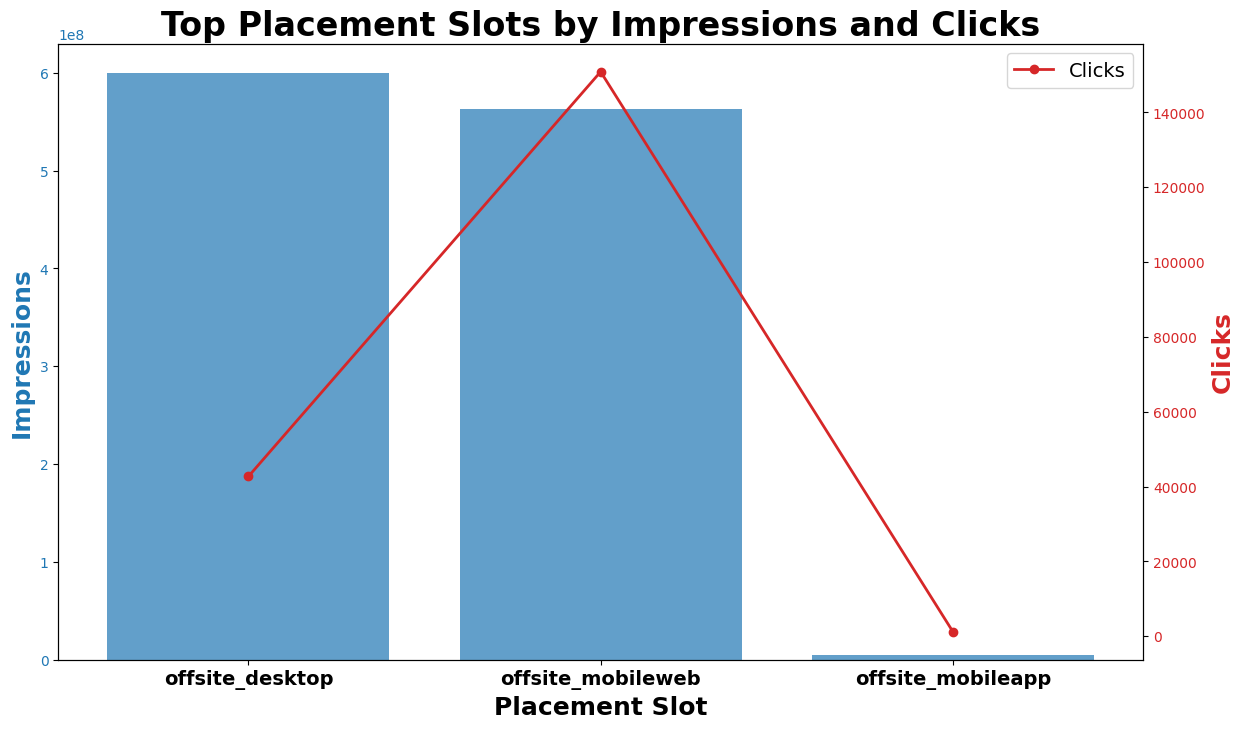

Top Placement Slots by Impressions and Clicks:
                    impressions  clicks
placement_slot                        
offsite_desktop      599765408   42697
offsite_mobileweb    562824172  150877
offsite_mobileapp      4700419    1207


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of impressions and clicks for each placement slot and sort by impressions
placement_performance = campaign_data.groupby('placement_slot')[['impressions', 'clicks']].sum().sort_values(by='impressions', ascending=False)

# Select the top 5 placement slots by impressions
top_5_placements = placement_performance.head(5)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot impressions on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Placement Slot', fontsize=18, fontweight='bold')
ax1.set_ylabel('Impressions', color=color, fontsize=18, fontweight='bold')
ax1.bar(top_5_placements.index, top_5_placements['impressions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_5_placements.index, rotation=0, fontsize=14, fontweight='bold')

# Create a secondary y-axis for clicks
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Clicks', color=color, fontsize=18, fontweight='bold')
ax2.plot(top_5_placements.index, top_5_placements['clicks'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
plt.legend(['Clicks'], loc='upper right', fontsize=14)

# Add title
plt.title('Top Placement Slots by Impressions and Clicks', fontsize=24, fontweight='bold')

# Display the plot
plt.show()

# Print the top 5 placement slots by impressions and clicks
print("Top Placement Slots by Impressions and Clicks:\n", top_5_placements)


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_62329/2469696409.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories_millions.values, y=top_10_categories_millions.index, palette='viridis')


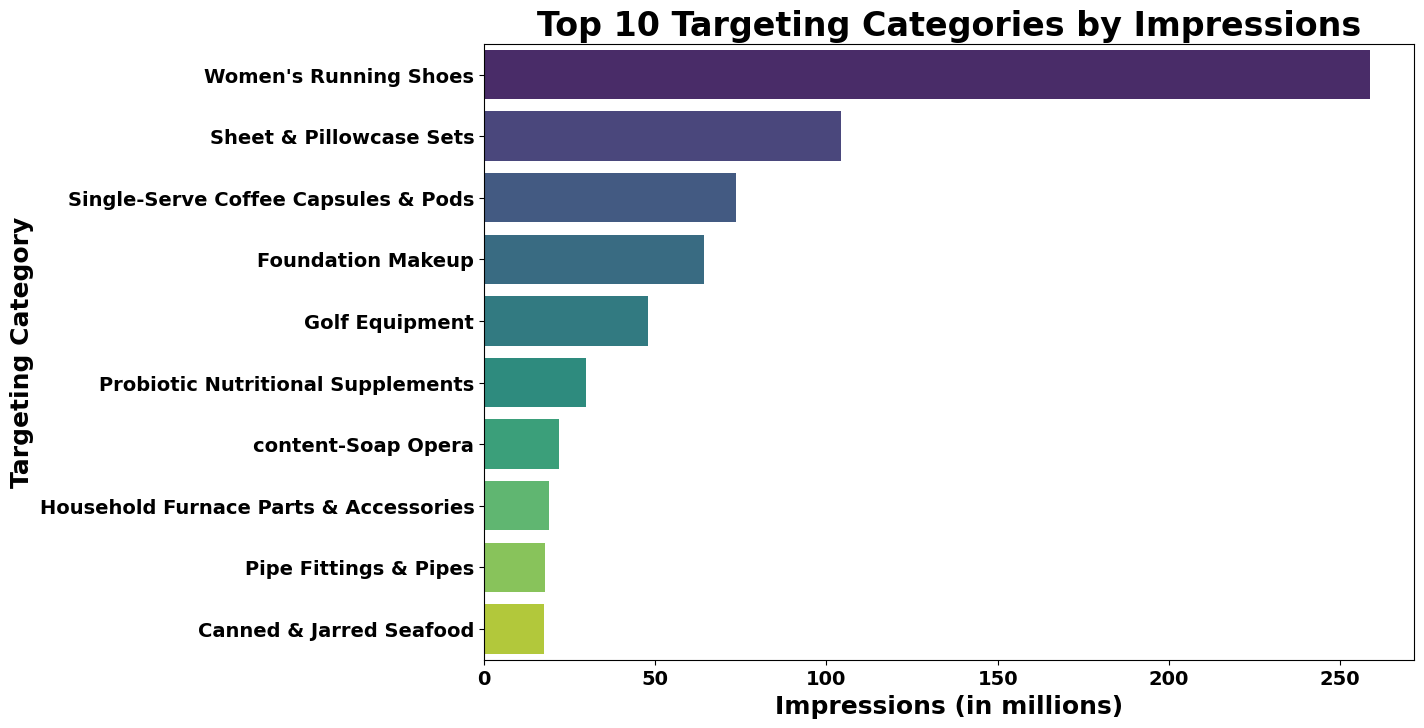

Top 10 Targeting Categories by Impressions (in millions):
 targeting_secondary
Women's Running Shoes                    258.663468
Sheet & Pillowcase Sets                  104.394351
Single-Serve Coffee Capsules & Pods       73.463203
Foundation Makeup                         64.220770
Golf Equipment                            48.021037
Probiotic Nutritional Supplements         29.811948
content-Soap Opera                        21.833995
Household Furnace Parts & Accessories     18.897932
Pipe Fittings & Pipes                     17.934055
Canned & Jarred Seafood                   17.503920
Name: impressions, dtype: float64


In [58]:
# Calculate the sum of impressions for each targeting category
targeting_categories = campaign_data.groupby('targeting_secondary')['impressions'].sum().sort_values(ascending=False)

# Remove 'category=' from the targeting categories' names
targeting_categories.index = targeting_categories.index.str.replace('category=', '')

# Select the top 10 targeting categories
top_10_categories = targeting_categories.head(10)

# Convert impressions to millions
top_10_categories_millions = top_10_categories / 1_000_000

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_categories_millions.values, y=top_10_categories_millions.index, palette='viridis')

# Add titles and labels with bold text and large font
plt.title('Top 10 Targeting Categories by Impressions', fontsize=24, fontweight='bold')
plt.xlabel('Impressions (in millions)', fontsize=18, fontweight='bold')
plt.ylabel('Targeting Category', fontsize=18, fontweight='bold')

# Customize the tick parameters for better visibility
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Display the plot
plt.show()

# Print the top 10 targeting categories by impressions in millions
print("Top 10 Targeting Categories by Impressions (in millions):\n", top_10_categories_millions)


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_62329/3087026644.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_placements_millions.index, y=top_5_placements_millions['impressions'], palette='viridis')


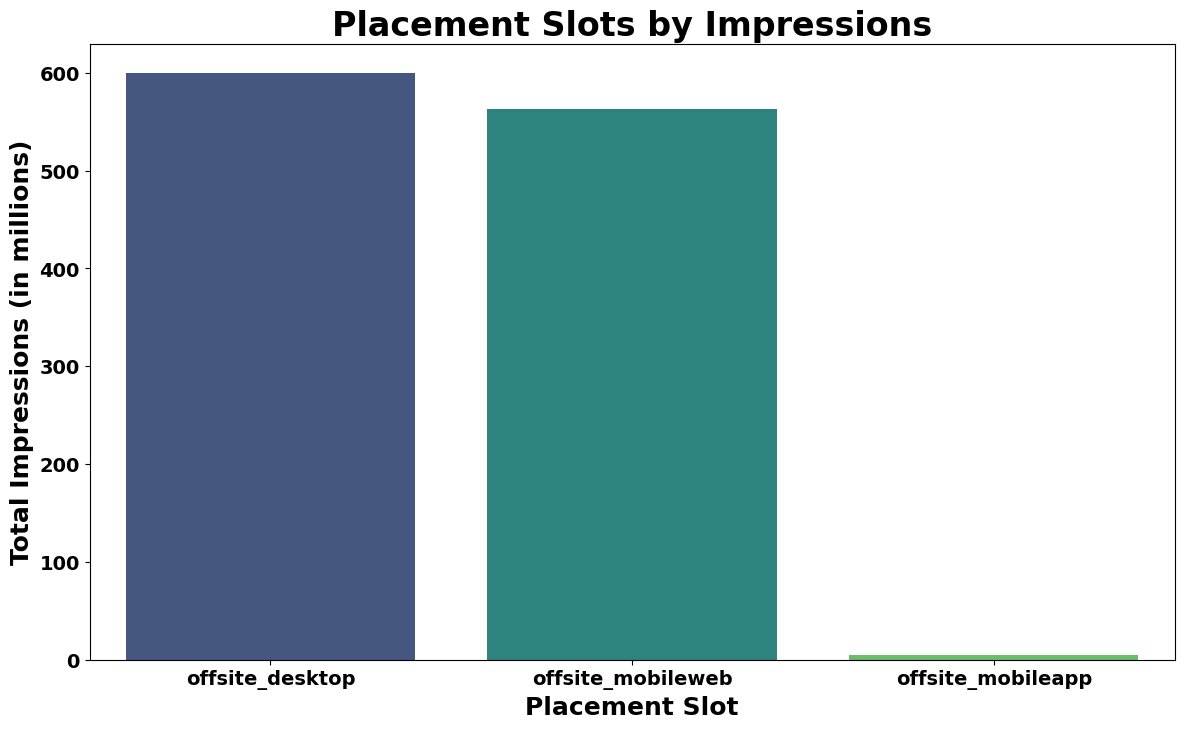

Placement Slots by Impressions (in millions):
                    impressions
placement_slot                
offsite_desktop     599.765408
offsite_mobileweb   562.824172
offsite_mobileapp     4.700419


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of impressions for each placement slot and sort by impressions
placement_performance = campaign_data.groupby('placement_slot')[['impressions']].sum().sort_values(by='impressions', ascending=False)

# Select the top 5 placement slots by impressions
top_5_placements = placement_performance.head(5)

# Convert impressions to millions
top_5_placements_millions = top_5_placements / 1_000_000

# Create a bar plot for the top 5 placement slots
plt.figure(figsize=(14, 8))
sns.barplot(x=top_5_placements_millions.index, y=top_5_placements_millions['impressions'], palette='viridis')

# Add titles and labels with bold text and large font
plt.title('Placement Slots by Impressions', fontsize=24, fontweight='bold')
plt.xlabel('Placement Slot', fontsize=18, fontweight='bold')
plt.ylabel('Total Impressions (in millions)', fontsize=18, fontweight='bold')

# Customize the tick parameters for better visibility
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Display the plot
plt.show()

# Print the top 5 placement slots by impressions in millions
print("Placement Slots by Impressions (in millions):\n", top_5_placements_millions)


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_62329/2437637058.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_5_placements.index, rotation=0, fontsize=14, fontweight='bold')


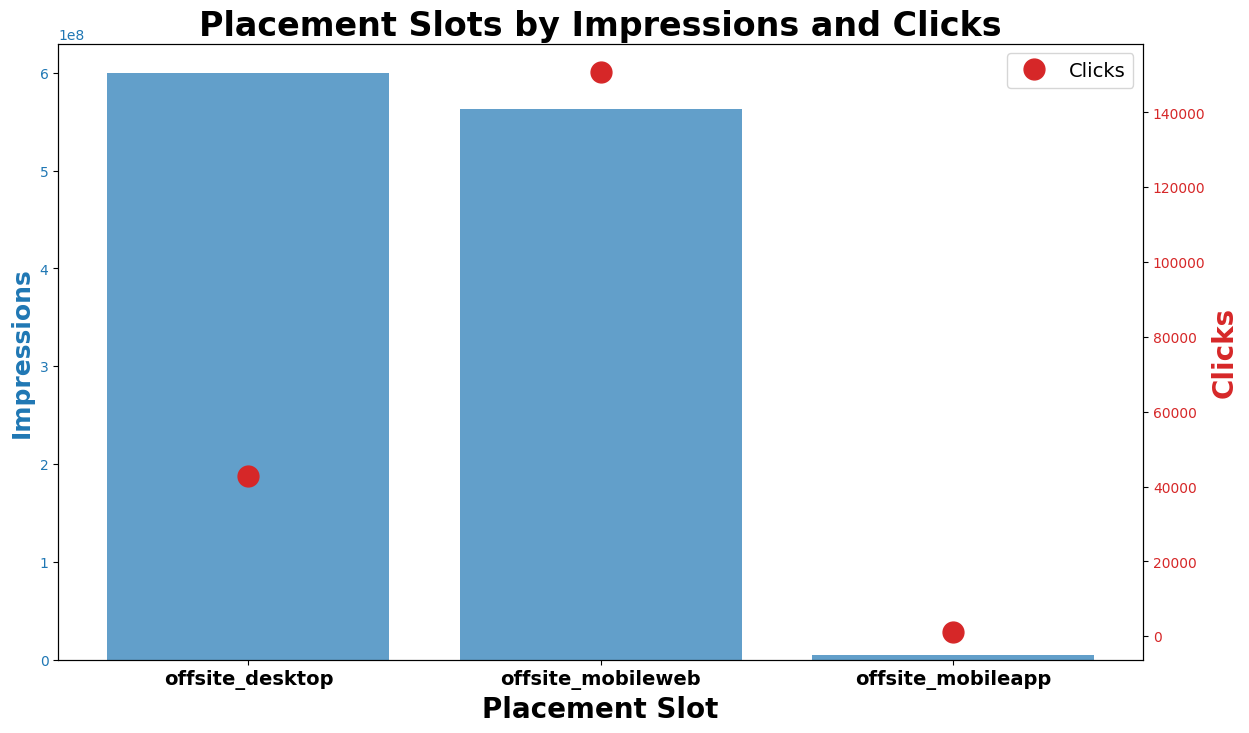

Top Placement Slots by Impressions and Clicks:
                    impressions  clicks
placement_slot                        
offsite_desktop      599765408   42697
offsite_mobileweb    562824172  150877
offsite_mobileapp      4700419    1207


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of impressions and clicks for each placement slot and sort by impressions
placement_performance = campaign_data.groupby('placement_slot')[['impressions', 'clicks']].sum().sort_values(by='impressions', ascending=False)

# Select the top 5 placement slots by impressions
top_5_placements = placement_performance.head(5)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot impressions on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Placement Slot', fontsize=20, fontweight='bold')
ax1.set_ylabel('Impressions', color=color, fontsize=18, fontweight='bold')
ax1.bar(top_5_placements.index, top_5_placements['impressions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_5_placements.index, rotation=0, fontsize=14, fontweight='bold')

# Create a secondary y-axis for clicks
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Clicks', color=color, fontsize=20, fontweight='bold')
ax2.plot(top_5_placements.index, top_5_placements['clicks'], color=color, marker='o', markersize=15, linestyle='', label='Clicks')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
ax2.legend(loc='upper right', fontsize=14)

# Add title
plt.title('Placement Slots by Impressions and Clicks', fontsize=24, fontweight='bold')

# Display the plot
plt.show()

# Print the top 5 placement slots by impressions and clicks
print("Top Placement Slots by Impressions and Clicks:\n", top_5_placements)


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_62329/2750093493.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_5_placements.index, rotation=0, fontsize=14, fontweight='bold')


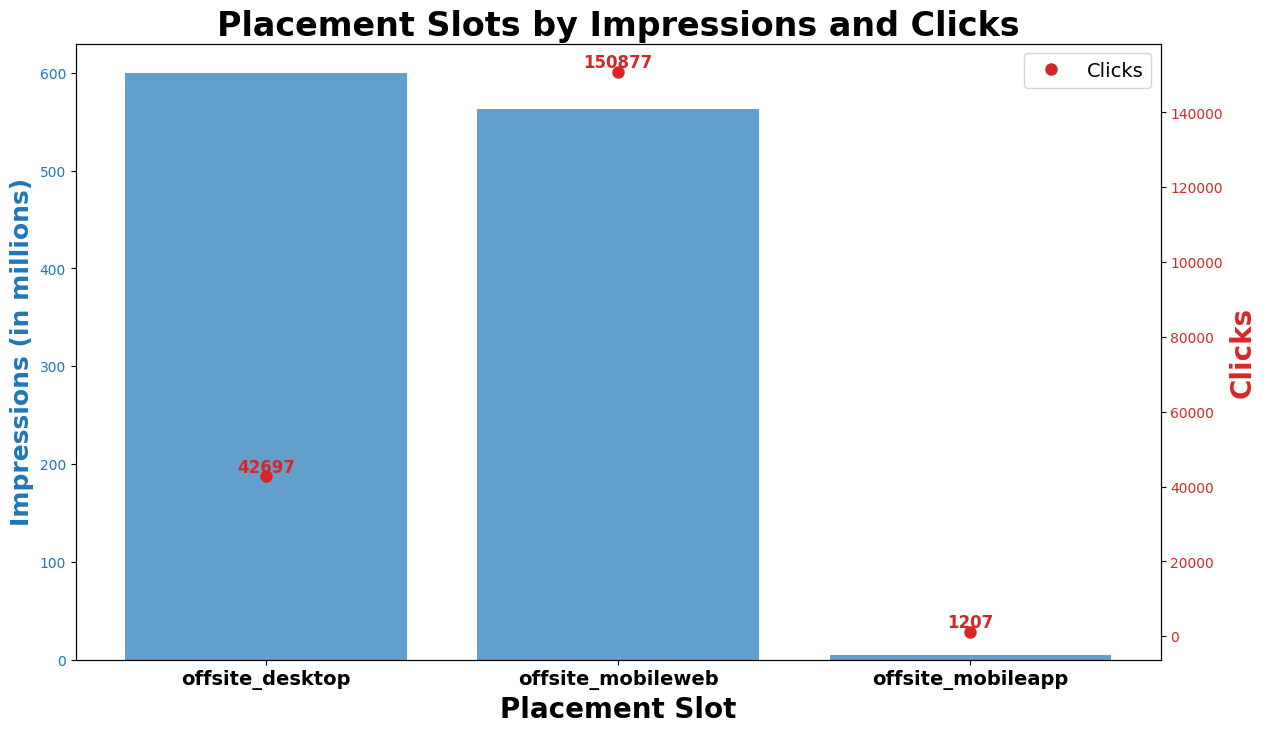

Placement Slots by Impressions and Clicks:
                    impressions  clicks
placement_slot                        
offsite_desktop     599.765408   42697
offsite_mobileweb   562.824172  150877
offsite_mobileapp     4.700419    1207


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of impressions and clicks for each placement slot and sort by impressions
placement_performance = campaign_data.groupby('placement_slot')[['impressions', 'clicks']].sum().sort_values(by='impressions', ascending=False)

# Select the top 5 placement slots by impressions
top_5_placements = placement_performance.head(5)

# Convert impressions to millions
top_5_placements['impressions'] = top_5_placements['impressions'] / 1_000_000

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot impressions on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Placement Slot', fontsize=20, fontweight='bold')
ax1.set_ylabel('Impressions (in millions)', color=color, fontsize=18, fontweight='bold')
ax1.bar(top_5_placements.index, top_5_placements['impressions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_5_placements.index, rotation=0, fontsize=14, fontweight='bold')

# Create a secondary y-axis for clicks
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Clicks', color=color, fontsize=20, fontweight='bold')
ax2.plot(top_5_placements.index, top_5_placements['clicks'], color=color, marker='o', markersize=8, linestyle='', label='Clicks')
ax2.tick_params(axis='y', labelcolor=color)

# Add click values on the plot
for i, value in enumerate(top_5_placements['clicks']):
    ax2.text(i, value, f'{value}', ha='center', va='bottom', fontsize=12, color=color, fontweight='bold')

# Add legend
ax2.legend(loc='upper right', fontsize=14)

# Add title
plt.title('Placement Slots by Impressions and Clicks', fontsize=24, fontweight='bold')

# Display the plot
plt.show()

# Print the top 5 placement slots by impressions and clicks
print("Placement Slots by Impressions and Clicks:\n", top_5_placements)


In [52]:
# Basic statistical analysis
campaign_data_desc = campaign_data.describe()

# Check for missing values
missing_values = campaign_data.isnull().sum()

# Analyze the distribution of key metrics
impressions_dist = campaign_data['impressions'].describe()
clicks_dist = campaign_data['clicks'].describe()
auction_cost_dist = campaign_data['auction_cost'].describe()
adjusted_cost_dist = campaign_data['adjusted_cost'].describe()


impressions_dist, clicks_dist, auction_cost_dist, adjusted_cost_dist


(count    566696.000000
 mean       2059.816902
 std        3794.986567
 min           1.000000
 25%          21.000000
 50%         357.000000
 75%        2035.000000
 max      117800.000000
 Name: impressions, dtype: float64,
 count    566696.000000
 mean          0.343713
 std           1.629640
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max          59.000000
 Name: clicks, dtype: float64,
 count    566696.000000
 mean         24.485337
 std          48.835459
 min           0.000000
 25%           0.250000
 50%           4.180155
 75%          25.836320
 max        2809.760000
 Name: auction_cost, dtype: float64,
 count    566696.000000
 mean         17.830316
 std          33.712855
 min           0.000000
 25%           0.180000
 50%           3.134000
 75%          18.222113
 max        1072.012760
 Name: adjusted_cost, dtype: float64)

Impressions: The data shows a high variance in impressions with a significant range from 1 to 23045. The median value is much lower than the mean, suggesting a right-skewed distribution.
Clicks: The average number of clicks is very low, with most observations having zero clicks.
Auction Cost: There is a wide range in auction costs, with a few high-value outliers pulling the mean higher.
Adjusted Cost: Similarly, the adjusted cost has a wide range, indicating variability in the cost dynamics of the ad auctions.

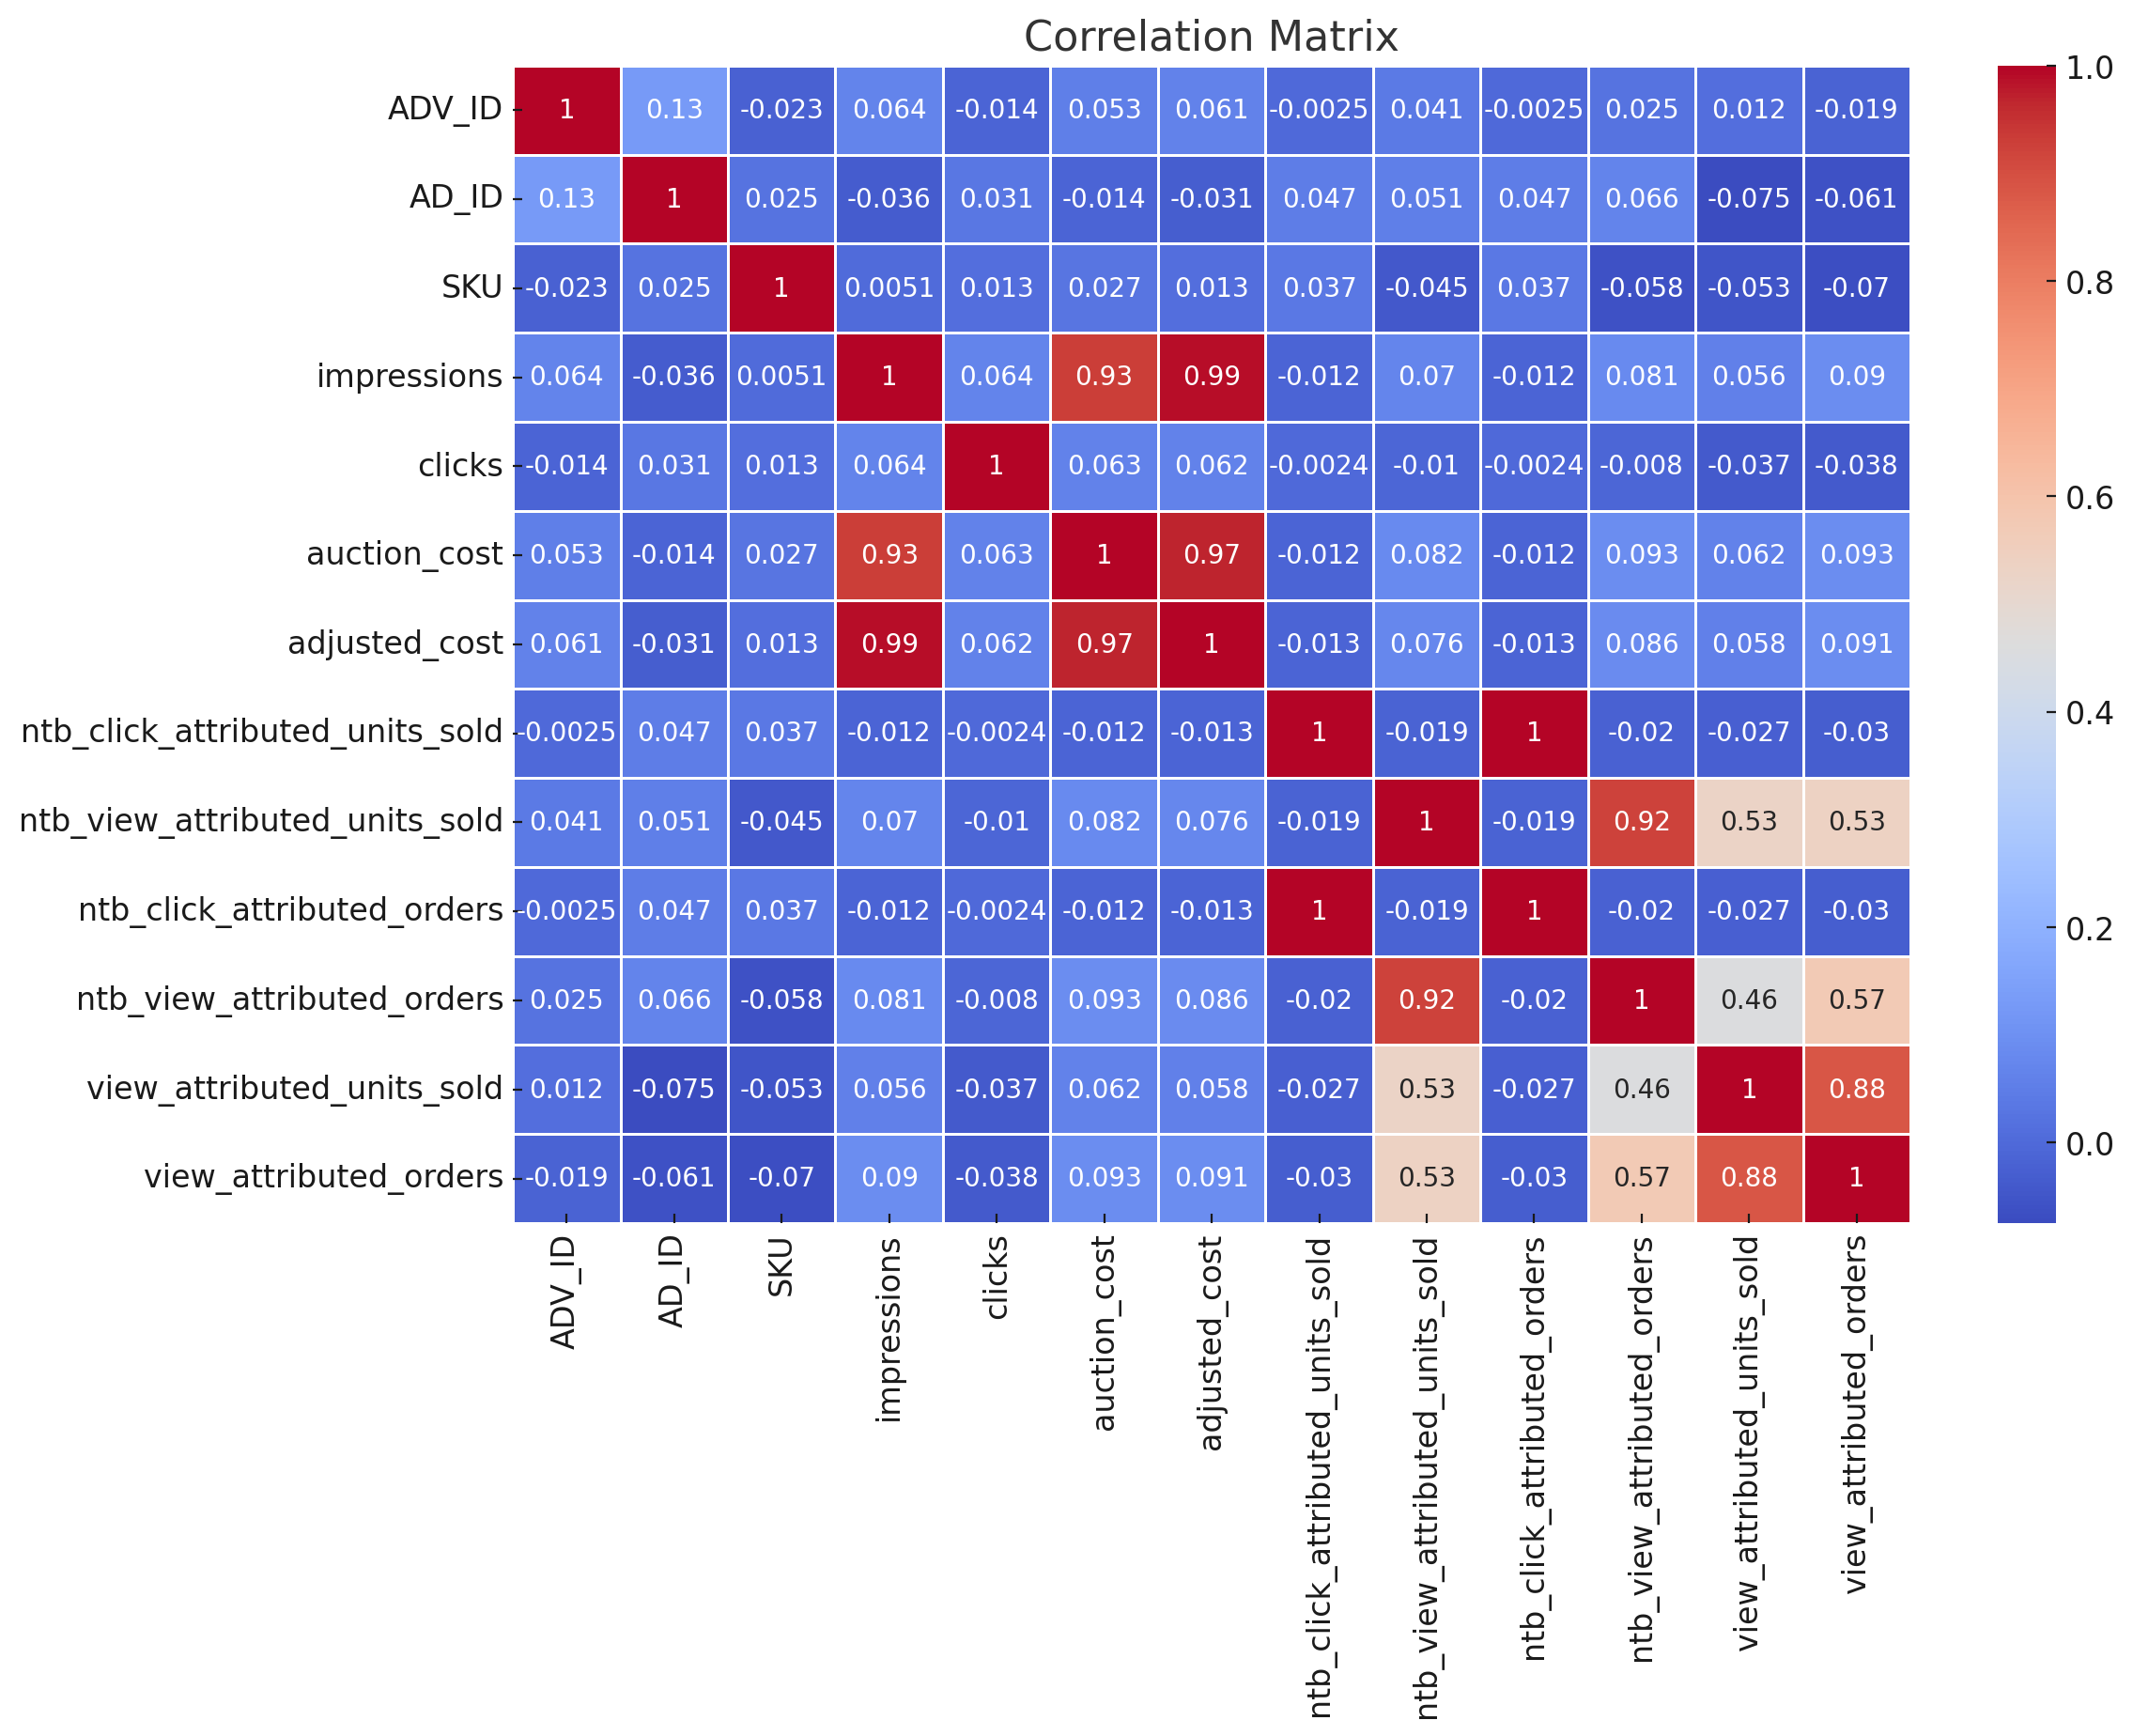


Visualization and Correlation Analysis
Distribution Analysis
Impressions: The distribution is right-skewed with most ads having fewer impressions and a long tail of ads with high impressions.
Clicks: The majority of the data points have zero clicks, indicating a large number of ads did not receive any clicks.
Auction Cost: The auction cost also shows a right-skewed distribution with a few ads having significantly higher costs.
Adjusted Cost: Similar to auction cost, the adjusted cost distribution is right-skewed.
Correlation Analysis
The heatmap of the correlation matrix shows the relationships between different numerical variables:

Impressions have a moderate positive correlation with both auction cost and adjusted cost, indicating that higher auction costs generally lead to more impressions.
Clicks do not show a strong correlation with any other variable, suggesting that other factors might influence click rates.
Auction Cost and Adjusted Cost have a very high positive correlation, which is expected as adjusted cost is derived from auction cost.

Let's create additional features that might help improve the model performance:


Cost per Click: adjusted_cost divided by clicks (with handling for zero clicks)
Click-Through Rate (CTR): clicks divided by impressions
Impressions per Click: impressions divided by clicks (with handling for zero clicks)

In [8]:
# Create additional features


campaign_data['ctr'] = campaign_data['clicks'] / campaign_data['impressions']

# Replace inf values with 0 (result of division by zero)
campaign_data.replace([float('inf'), -float('inf')], 0, inplace=True)

# Define the target variable: whether an ad results in at least one click
campaign_data['clicked'] = campaign_data['clicks'] > 0




In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score

# Select features and target variable
features = ['clicks','auction_cost', 'adjusted_cost', 'ctr']
target = 'impressions'

X = campaign_data[features]
y = campaign_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
cv_scores_mean = cv_scores.mean()

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

classification_rep, roc_auc, pr_auc, cv_scores_mean


: 

Observations
The logistic regression model performs exceptionally well on both training and testing data, with a very high AUC and precision-recall scores.
The high precision but lower recall for the "Click" class indicates that while the model is very good at predicting when an ad will not be clicked, it misses some instances where an ad is clicked (false negatives).